# Analysis of Students Performance in Examination
This Data Set consists of marks secured by the students in college
## Objective-                                                                                                                                                           To study the influence of various factors on Student's performance in Examination.

##  To Find and Explore:
### 1. Major factors influencing the test scores
### 2. Impact of parental level of education on student's performance in exams
### 3. Effectiveness of test preparation course

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Number of Students passed and failed in math

In [12]:
passmark=40
df['MathPassed']=np.where(df['math score']<passmark,'F','P')
df.MathPassed.value_counts()

P    960
F     40
Name: MathPassed, dtype: int64

## Number of students passed and failed in reading

In [35]:
df['ReadingPass']=np.where(df['reading score']>passmark,'P','F')
df.ReadingPass.value_counts()

P    973
F     27
Name: ReadingPass, dtype: int64

## Number of students passed and failed in Writing

In [36]:
df['WritingPass']=np.where(df['writing score']>passmark,'P','F')
df.WritingPass.value_counts()

P    965
F     35
Name: WritingPass, dtype: int64

## Number of Students who Passed and Failed in all subjects

In [39]:
df['FinalPass']=df.apply(lambda x: 'P' if x['MathPassed']=='P' and x['ReadingPass']=='P' and x['WritingPass']=='P'
                                    else 'F',axis=1)

In [40]:
df.FinalPass.value_counts()

P    947
F     53
Name: FinalPass, dtype: int64

### Calculating Percentage and Grades

In [42]:
df['Total']=df['math score']+df['reading score']+df['writing score']
df['Percentage']=df['Total']/3

In [44]:
def Grading(Percentage,FinalPass):
    if FinalPass=='F':
        return 'F'
    if Percentage>=90:
        return 'S'
    if Percentage>=80 and Percentage<90:
        return'A'
    if Percentage>=70 and Percentage<80:
        return'B'
    if Percentage>=60 and Percentage<70:
        return'C'
    if Percentage>=50 and Percentage<60:
        return'D'
    if Percentage>40 and Percentage<50:
        return'E'
    else:
        return 'F'
df['Grade']=df.apply(lambda x: Grading(x['Percentage'],x['FinalPass']),axis=1)
df.Grade.value_counts()

B    261
C    256
D    178
A    146
E     54
F     53
S     52
Name: Grade, dtype: int64

<AxesSubplot:xlabel='Grade', ylabel='count'>

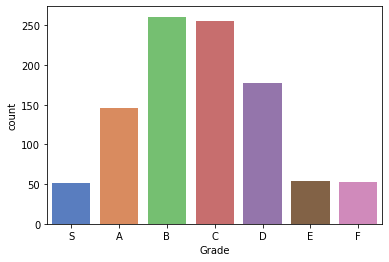

In [45]:
sns.countplot(x=df['Grade'],data=df,order=['S','A','B','C','D','E','F'],palette='muted')

## Impact of parental level of education on student's performance in exams

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

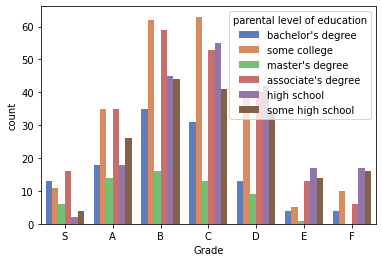

In [59]:
p=sns.countplot(x=df['Grade'],data=df,hue='parental level of education',order=['S','A','B','C','D','E','F'], palette='muted')
plt.setp(p.get_xticklabels(),rotation=0)

## OBSERVATIONS:
1. No student having parental level of education of masters or bachelors have failed or gotten F grade.
2. The students having parental level of education of high school or some high schools are the ones with more number of F          Grades.
3. The students having parental level of education of some college are more in numbers in A,B and C grades with students having    parental level of education of associate degree less far behind them.

## Effectiveness of test preparation course In Securing Grades

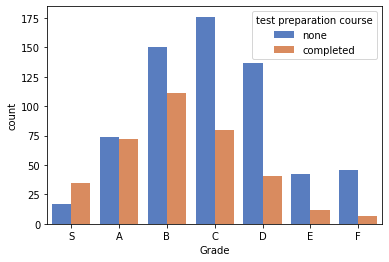

In [60]:
p=sns.countplot(x=df['Grade'],data=df,hue='test preparation course',palette='muted',order=['S','A','B','C','D','E','F'])

## Observation
1. Number of students failing the test is less when test preparation course is taken
2. From all the students securing Grade S, the majority are the students who completed the test preparation course
3. Most of the students who did not take the test preparation course, ended up more in average grades like B, C  and D whereas      the students who completed the course have secured S,A and B grades.